In [1]:
# Packages to run the code

import sympy as sp

## Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from scipy.stats import binom
from scipy.special import gamma

## Calculations
import numpy as np

from IPython.display import display
sp.init_printing()
%matplotlib notebook

In [2]:
def choose(x,y):
    return gamma(x+1)/(gamma(y+1)*gamma(x-y+1))

<IPython.core.display.Javascript object>


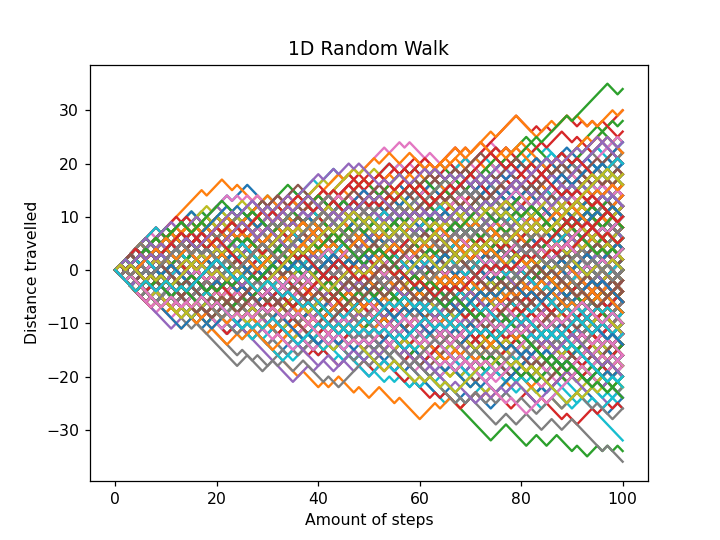

In [3]:
# Generate random walk

## Define parameters for the walk
dims = 1
step_n = 100

step_size = 1

step_set = [-step_size, step_size]
origin = np.zeros((1,dims))

## Plot the path

P = []

fig,ax = plt.subplots(1,1)

tries = 1000

for j in range(0,tries):
    
    ## Simulate steps in 3D
    step_shape = (step_n,dims)
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    P.append(path[-1:][0][0])

    ax.plot(path)
    

plt.title('1D Random Walk')

plt.xlabel('Amount of steps')
plt.ylabel('Distance travelled')

plt.show()

In [4]:
r = np.linspace(-step_n*step_size, step_n*step_size, 2*step_n+1)
r_cont = np.linspace(-step_n*step_size, step_n*step_size, (2*step_n+1)*5)

#r = np.linspace(-1000, 1000, step_size)
#r_cont = np.linspace(-step_n*step_size, step_n*step_size, step_size*5)


distribution = []

distribution = choose(step_n, (step_n+r_cont/step_size)/2)*1/2**(step_n)

<IPython.core.display.Javascript object>


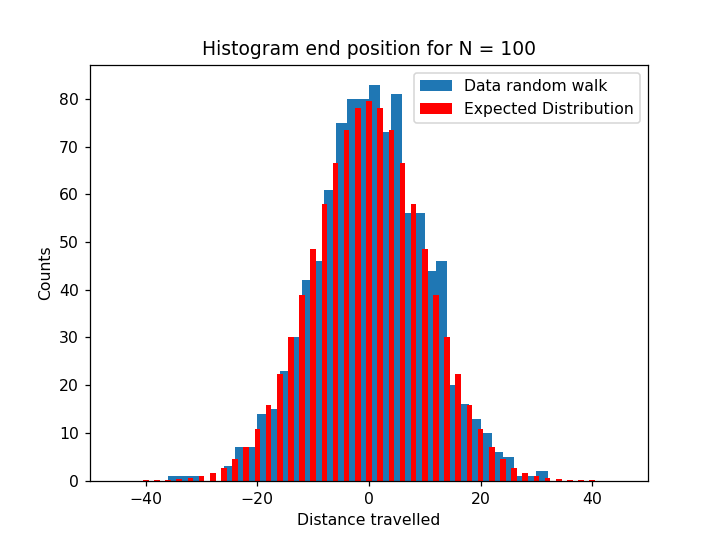

In [5]:
fig,ax = plt.subplots(1,1)

plt.hist(P, bins=np.arange(min(P), max(P), 2*step_size), label = 'Data random walk')

#plt.plot(r_cont, distribution*tries, label = 'real')
#plt.plot(r_cont, 2*np.sqrt(1/(2*np.pi*step_n))*np.exp(-(r_cont)**2/(2*step_n*step_size**2))*tries, label = 'Gaussian')

# list of pmf values
dist = [binom.pmf((step_n+d/step_size)/2, step_n, 1/2) for d in r] # 1/2**n zit hier an in verwerkt
dist = np.array(dist)
dist = dist*tries
# plotting the graph 
plt.bar(r, dist, label = 'Expected Distribution', color = 'red', width = step_size)



plt.legend()

plt.ylabel('Counts')
plt.xlabel('Distance travelled')

plt.xlim(-50,50)

plt.title('Histogram end position for N = ' + str(step_n))

plt.show()

<IPython.core.display.Javascript object>


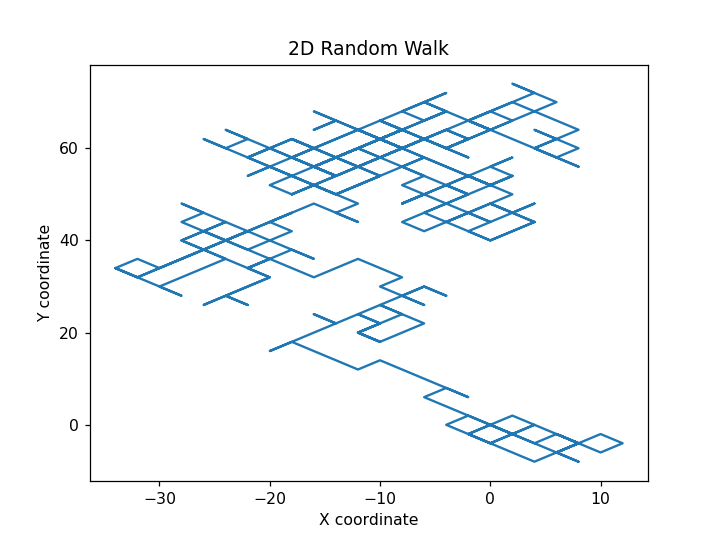

In [6]:
# Generate random walk

## Define parameters for the walk
dims = 1
step_n = 500

step_size = 2
a = np.sqrt(2)*step_size # because we jump with step_size in both the x and y direction, the length of a line = sqrt(x**2+y**2)
# = sqrt(2) *step_size

step_set = [-step_size,step_size]
origin = np.zeros((1,dims))

## Plot the path

fig,ax = plt.subplots(1,1)

tries = 1

gyration = []

for k in range(0,tries):
    
    ## Simulate steps in 3D
    step_shape = (step_n,dims)
    stepsx = np.random.choice(a=step_set, size=step_shape)
    pathx = np.concatenate([origin, stepsx]).cumsum(0)
    
    stepsy = np.random.choice(a=step_set, size=step_shape)
    pathy = np.concatenate([origin, stepsy]).cumsum(0)
    
    ax.plot(pathx,pathy)
    
    Rg = 0
    for i in range(len(pathx)):
        for j in range(len(pathx)):
            Rg += (pathx[i][0]-pathx[j][0])**2+(pathy[i][0]-pathy[j][0])**2
    Rg = Rg/(2*(step_n+1)**2)
    Rg = np.sqrt(Rg)
    gyration.append(Rg)


plt.title('2D Random Walk')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

plt.show()

In [7]:
Rg = 0

for i in range(len(pathx)):
    for j in range(len(pathx)):
        Rg += (pathx[i][0]-pathx[j][0])**2+(pathy[i][0]-pathy[j][0])**2
Rg = Rg/(2*(step_n+1)**2)
Rg = np.sqrt(Rg)

comx = 0
comy = 0

for i in range(len(pathx)):
    comx += pathx[i][0]
    comy += pathy[i][0]

comx = comx/(step_n+1)
comy = comy/(step_n+1)

Rg

<IPython.core.display.Javascript object>


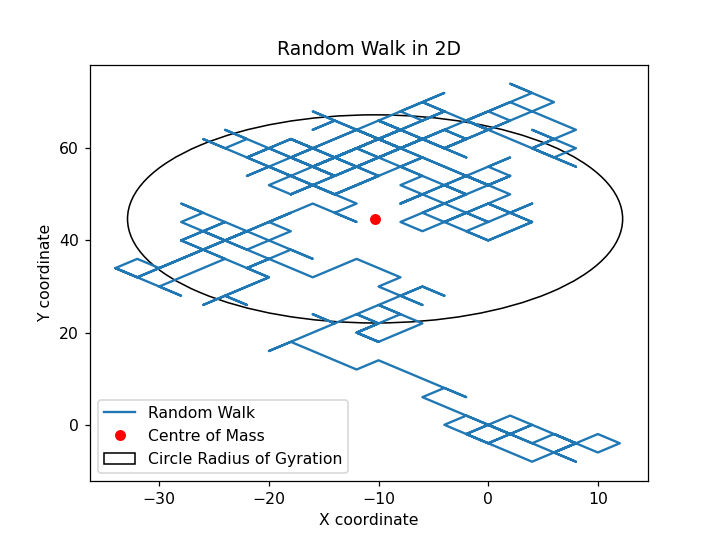

<function matplotlib.pyplot.show(*args, **kw)>

In [8]:
fig,ax = plt.subplots(1,1)

ax.plot(pathx,pathy, label = 'Random Walk')
ax.plot(comx,comy, 'ro', label = 'Centre of Mass')

circle1 = plt.Circle((comx, comy), Rg, fill = False, label = 'Circle Radius of Gyration')

ax.add_patch(circle1)

plt.title('Random Walk in 2D')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')


plt.legend()

plt.show

In [9]:
gyration = np.array(gyration)
rg = np.mean(gyration)

print('The calculated radius is '+ str(round(rg,3)))
print('The expected radius is '+ str(round(np.sqrt(step_n*a**2/6*(step_n+2)/(step_n+1)),3)))
print('The approximation for large N gives '+ str(round(np.sqrt(step_n*a**2/6),3)))

The calculated radius is 22.575
The expected radius is 25.846
The approximation for large N gives 25.82
